# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Ardiyanto]
- **Email:** [ardiyanto24042002@gmail.com]
- **ID Dicoding:** [ardiyanto_gnBw]

## Menentukan Pertanyaan Bisnis

- Pada bulan apa peminjaman sepeda tertinggi
- Apakah ada pengaruh season terhadap minat sewa sepeda

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Baca file CSV dari Google Drive
file_path = '/content/drive/My Drive/Project/Bangkit/day.csv'
day_df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari DataFrame
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
# info data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# identification missing value day_df
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# cek duplikasi data
print('Jumlah duplikasi day_df: ', day_df.duplicated().sum())

Jumlah duplikasi day_df:  0


In [ ]:
# cek statistika deskriptif data day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [ ]:
# Ubah tipe data kolom 'dteday' menjadi tipe data waktu
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Tampilkan informasi tipe data setelah diubah
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.describe(include='all')

<ipython-input-11-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [ ]:
# Analisis Persewaan Per Bulan
rentals_by_month = day_df.groupby('mnth').agg({
    'cnt': ['sum', 'mean', 'median']
})

rentals_by_month

cnt                     
         sum         mean  median
mnth                             
1     134933  2176.338710  1939.0
2     151352  2655.298246  2402.0
3     228920  3692.258065  3216.5
4     269094  4484.900000  4293.5
5     331686  5349.774194  4890.5
6     346342  5772.366667  5308.5
7     344948  5563.677419  5446.5
8     351194  5664.419355  5229.5
9     345991  5766.516667  5384.0
10    322352  5199.225806  5013.0
11    254831  4247.183333  4081.0
12    211036  3403.806452  3444.0

In [ ]:
# Analisis Persewaan Berdasarkan Musim
rentals_by_season = day_df.groupby('season').agg({
    'cnt': ['sum', 'mean', 'median']
})

rentals_by_season

cnt                     
            sum         mean  median
season                              
1        471348  2604.132597  2209.0
2        918589  4992.331522  4941.5
3       1061129  5644.303191  5353.5
4        841613  4728.162921  4634.5

In [ ]:
day_df.groupby(by="mnth").instant.nunique().sort_values(ascending=False)

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: instant, dtype: int64

In [ ]:
# Menggabungkan dua kolom dan membuat kolom baru 'total_rentals'
day_df['total_rentals'] = day_df['casual'] + day_df['registered']

# Menampilkan dataframe dengan kolom baru
print(day_df)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.

In [ ]:
# Mengelompokkan berdasarkan bulan dan menjumlahkan kolom 'total_rentals'
rentals_by_month = day_df.groupby('mnth')['total_rentals'].sum()

# Menampilkan hasil
print(rentals_by_month)

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: total_rentals, dtype: int64


In [ ]:
# Mengelompokkan berdasarkan season dan menjumlahkan kolom 'total_rentals'
rentals_by_season = day_df.groupby('season')['total_rentals'].sum()

# Menampilkan hasil
print(rentals_by_season)

season
1     471348
2     918589
3    1061129
4     841613
Name: total_rentals, dtype: int64


In [ ]:
# Mengurutkan DataFrame berdasarkan jumlah total orang yang menyewa sepeda
rentals_by_month_sorted = rentals_by_month.sort_values(ascending=False)

# Mengurutkan DataFrame berdasarkan jumlah total orang yang menyewa sepeda
rentals_by_season_sorted = rentals_by_season.sort_values(ascending=False)

In [ ]:
rentals_by_month_sorted

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: total_rentals, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

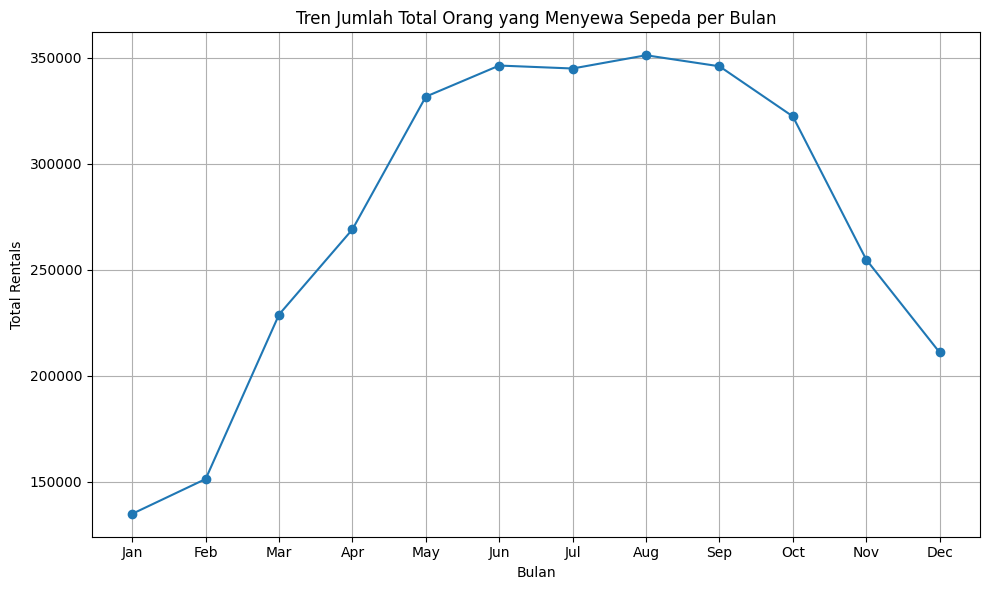

In [ ]:
# Membuat line chart untuk menampilkan tren jumlah total rentals per bulan
plt.figure(figsize=(10, 6))
plt.plot(rentals_by_month.index, rentals_by_month.values, marker='o', linestyle='-')

plt.title('Tren Jumlah Total Orang yang Menyewa Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Rentals')
plt.xticks(rentals_by_month.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()

plt.show()

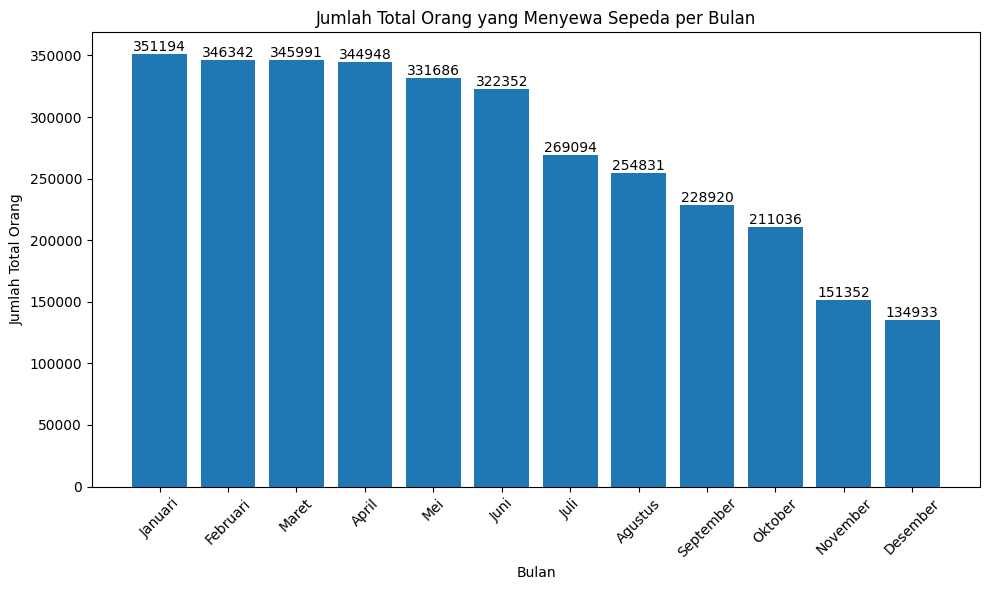

In [ ]:
# Daftar nama bulan
nama_bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Buat bar chart untuk DataFrame berdasarkan bulan dengan urutan yang sama seperti pada tabel
plt.figure(figsize=(10, 6))
bars = plt.bar(nama_bulan, rentals_by_month_sorted.values)
plt.title('Jumlah Total Orang yang Menyewa Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Total Orang')
plt.xticks(rotation=45)
plt.tight_layout()

# Tambahkan label pada batang bar chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

### Pertanyaan 2:

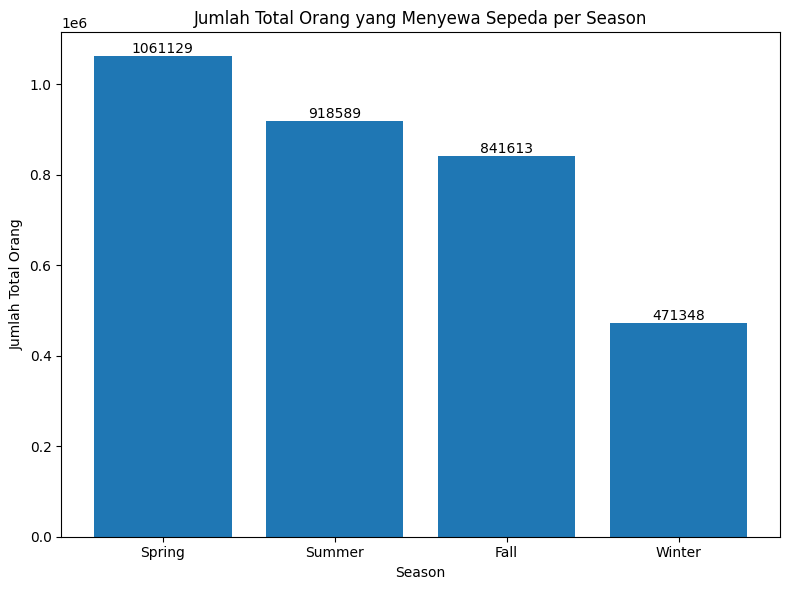

In [ ]:
# Membuat bar chart untuk membandingkan jumlah total orang yang menyewa sepeda pada setiap season dengan urutan yang sama seperti pada bulan
plt.figure(figsize=(8, 6))
bars = plt.bar(range(len(rentals_by_season_sorted)), rentals_by_season_sorted.values)

plt.title('Jumlah Total Orang yang Menyewa Sepeda per Season')
plt.xlabel('Season')
plt.ylabel('Jumlah Total Orang')
plt.xticks(range(len(rentals_by_season_sorted)), labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.tight_layout()

# Tambahkan label pada batang bar chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

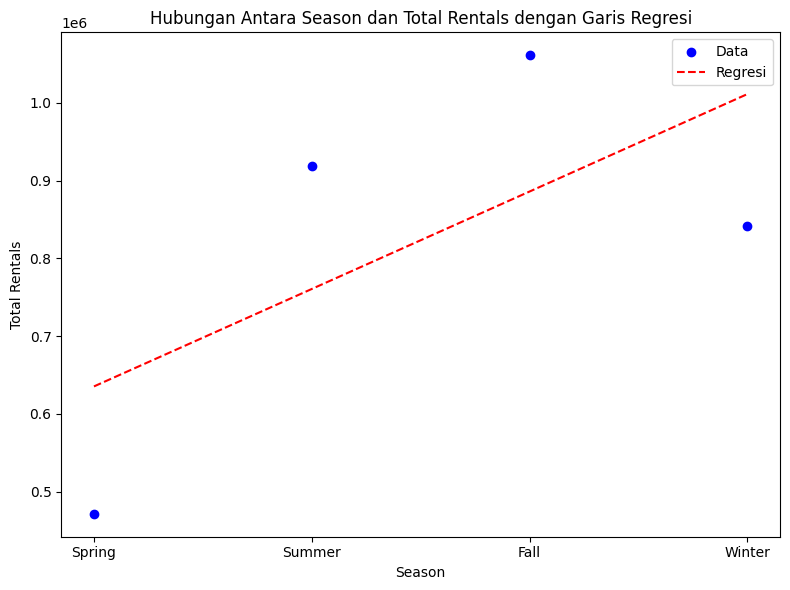

In [ ]:
# Menghitung koefisien regresi linier
slope, intercept, r_value, p_value, std_err = stats.linregress(rentals_by_season.index, rentals_by_season.values)

# Membuat garis regresi
regression_line = slope * rentals_by_season.index + intercept

# Membuat scatter plot untuk menampilkan hubungan antara season dan total rentals
plt.figure(figsize=(8, 6))
plt.scatter(rentals_by_season.index, rentals_by_season.values, color='blue', label='Data')
plt.plot(rentals_by_season.index, regression_line, color='red', linestyle='--', label='Regresi')

plt.title('Hubungan Antara Season dan Total Rentals dengan Garis Regresi')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(rentals_by_season.index, labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend()
plt.tight_layout()

plt.show()

## Conclusion

- Bulan dengan persewaan sepeda tertinggi adalah bulan Agustus
- Terdapat hubungan antara jumlah persewaan sepeda dengan musin, terlihat dari scatter plotnya